In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('Rendimiento CMP V2.xlsx', sheet_name='MinaMLC')
#df.head()

Se usaron para el estudio, solo los datos de CMP Valle del Huasco, Mina los colorados ya que es aquella subdivisión con la mayor cantidad de registros asociados a colaboradores.

In [3]:
df_ = df[df['División de personal'] == 'CMP VALLE DEL HUASCO']
df_test_minera_colorado = df_[df_['Subdivisión de personal'] == 'MINA LOS COLORA']
#df_test_minera_colorado.head()

In [4]:
df_ = df_test_minera_colorado
#df_.head()

In [5]:
df_.columns

Index(['Dia', 'Turno', 'Equipo', 'Cargas (u)', 'Movimiento (t)', 'tefe (seg)',
       'tdem (seg)', 'R-ef (t/h)', 'Número de personal',
       'División de personal', 'Cod. División', 'Subdivisión de personal',
       'Cod. Subdivisión', 'Grupo de personal', 'Unidad organizativa',
       'Cod. Unidad', 'Posición', 'Cod. Posición', 'Fecha de nacimiento',
       'Edad del empleado', 'Fecha de alta',
       'Status empleado para Gestión tiempos per'],
      dtype='object')

In [6]:
filtro = ['División de personal',
          'Cod. División',
          'Subdivisión de personal',
          'Cod. Subdivisión',
          'Cod. Unidad',
          'Cod. Posición',
          'Fecha de nacimiento',
          'Grupo de personal']

In [7]:
df_.drop(filtro,axis=1,inplace=True)

In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 3137
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Dia                                       1825 non-null   datetime64[ns]
 1   Turno                                     1825 non-null   int64         
 2   Equipo                                    1825 non-null   int64         
 3   Cargas (u)                                1825 non-null   int64         
 4   Movimiento (t)                            1825 non-null   float64       
 5   tefe (seg)                                1825 non-null   int64         
 6   tdem (seg)                                1825 non-null   int64         
 7   R-ef (t/h)                                1825 non-null   float64       
 8   Número de personal                        1825 non-null   int64         
 9   Unidad organizativa           

In [9]:
df_.describe()

,Turno,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Número de personal,Edad del empleado
count,1825.00000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,1.50411,256.833973,65.164384,15089.483905,21772.320548,1919.663014,2422.582727,2.000280e+07,45.528219
std,0.50012,47.420979,41.631863,9665.474818,10993.633877,2041.227485,813.882872,2.033461e+03,11.608631
min,1.00000,210.000000,1.000000,216.899990,137.000000,0.000000,279.603580,2.000056e+07,26.000000
25%,1.00000,211.000000,31.000000,7210.500120,12797.000000,472.000000,1808.232502,2.000090e+07,34.000000
50%,2.00000,213.000000,61.000000,14138.999020,22504.000000,1341.000000,2355.800564,2.000279e+07,48.000000
75%,2.00000,306.000000,94.000000,21434.798830,31629.000000,2716.000000,3014.188792,2.000386e+07,57.000000
max,2.00000,307.000000,213.000000,50036.500000,42586.000000,18235.000000,6322.608522,2.000691e+07,64.000000


Se cambiaron los nombres de algunas columnas ya que eran demasiado largos o engorrosos

In [10]:
df_ = df_.rename(columns={'Dia':'Fecha'})
df_ = df_.rename(columns={'Status empleado para Gestión tiempos per':'Tipo medición tiempo'})
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 3137
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 1825 non-null   datetime64[ns]
 1   Turno                 1825 non-null   int64         
 2   Equipo                1825 non-null   int64         
 3   Cargas (u)            1825 non-null   int64         
 4   Movimiento (t)        1825 non-null   float64       
 5   tefe (seg)            1825 non-null   int64         
 6   tdem (seg)            1825 non-null   int64         
 7   R-ef (t/h)            1825 non-null   float64       
 8   Número de personal    1825 non-null   int64         
 9   Unidad organizativa   1825 non-null   object        
 10  Posición              1825 non-null   object        
 11  Edad del empleado     1825 non-null   int64         
 12  Fecha de alta         1825 non-null   datetime64[ns]
 13  Tipo medición tiem

Cambiamos el formato de algunas variables

In [11]:
df_['Turno'] = df_['Turno'].astype(str)

In [12]:
df_['Equipo'] = df_['Equipo'].astype(str)

In [13]:
df_['Número de personal'] = df_['Número de personal'].astype(str)

In [14]:
df_['Fecha'] = df_['Fecha'].astype(str)

In [15]:
df_['Fecha de alta'] = df_['Fecha de alta'].astype(str)

In [16]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 3137
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Turno                 1825 non-null   object 
 2   Equipo                1825 non-null   object 
 3   Cargas (u)            1825 non-null   int64  
 4   Movimiento (t)        1825 non-null   float64
 5   tefe (seg)            1825 non-null   int64  
 6   tdem (seg)            1825 non-null   int64  
 7   R-ef (t/h)            1825 non-null   float64
 8   Número de personal    1825 non-null   object 
 9   Unidad organizativa   1825 non-null   object 
 10  Posición              1825 non-null   object 
 11  Edad del empleado     1825 non-null   int64  
 12  Fecha de alta         1825 non-null   object 
 13  Tipo medición tiempo  1825 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 213.9+ KB


Se transforman las siguientes variables a variables dummy

In [17]:
unidad = pd.get_dummies(df_['Unidad organizativa'])
posicion = pd.get_dummies(df_['Posición'])
turno = pd.get_dummies(df_['Turno'])
fecha = pd.get_dummies(df_['Fecha'])
numero_personal = pd.get_dummies(df_['Número de personal'])
alta = pd.get_dummies(df_['Fecha de alta'])
tipo_tiempo = pd.get_dummies(df_['Tipo medición tiempo'])
equipo = pd.get_dummies(df_['Equipo'])

In [18]:
filtro = ['Equipo','Unidad organizativa','Posición','Turno','Fecha','Número de personal','Fecha de alta','Tipo medición tiempo']
df_.drop(filtro,axis=1,inplace=True)
df_.head()


,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
0,93,21134.20117,21517,814,3535.954093,29
1,12,2833.59961,5593,367,1823.879599,54
4,100,23335.70117,35320,2801,2378.497288,62
5,148,34061.60938,37283,960,3288.946538,48
6,7,1632.20007,2962,67,1983.767810,33


In [19]:
df_ = pd.concat([df_,unidad,posicion,turno,numero_personal,tipo_tiempo,equipo],axis=1)

In [20]:
df_.head()

,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado,ADMINISTRACION SUPTCIA PLANTAS,ALJIBES MLC,CAMIONES CAT 793F MLC,CAMIONES KOMATSU 830E MLC,CARGADORES FRONTALES MLC,GEOLOGIA DE PRODUCCION,INGENIERIA DE PROCESOS,MANTENIMIENTO MINA,MOTONIVELADORAS MLC,PALAS HIDRAULICAS MLC,PLANIFICACION MANTTO. MINA,SERVICIO SOCIAL VHUASCO,SISTEMAS DE CONTROL Y POTENCIA,TRACTORES NEUMATICOS MLC,TRACTORES ORUGA MLC,ASISTENTE GEOLOGIA,AYUDANTE ADMINISTRATIVO,CONTROLADOR PLANIFICACION,ELECTRICO I,ELECTRICO III,INGENIERO DE PROCESOS,JEFE SISTEMAS DE CONTROL Y POTENCIA,MECANICO I,MECANICO III,OPERADOR ELECTRICO II PLANTA,OPERADOR I,OPERADOR II,OPERADOR III,OPERADOR MECANICO III PLANTA,PLANIFICADOR MANTENIMIENTO MINA,1,2,20000564,20000770,20000778,20000847,20000868,20000875,20000905,20000964,20001014,20001236,20001237,20001512,20001526,20002297,20002520,20002787,20003239,20003244,20003260,20003278,20003408,20003778,20003779,20003858,20004398,20004884,20004895,20005055,20005968,20006912,"1 - Evaluación de tiempos, real","9 - Evaluación de tiempos, teórico",210,211,212,213,305,306,307
0,93,21134.20117,21517,814,3535.954093,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,12,2833.59961,5593,367,1823.879599,54,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,100,23335.70117,35320,2801,2378.497288,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,148,34061.60938,37283,960,3288.946538,48,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
6,7,1632.20007,2962,67,1983.767810,33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


# Definición de Funciones

In [21]:
def codo(K,X):
  sum_of_squared_distances = []
  for k in range(1,K):
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

  plt.plot(range(1,K),sum_of_squared_distances)
  plt.show()

In [22]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier

In [23]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

# Definimos la X

In [24]:
filtro = ['Cargas (u)', 'Movimiento (t)', 'tdem (seg)','R-ef (t/h)', 'Edad del empleado']
X = df_[filtro]
X.head()

,Cargas (u),Movimiento (t),tdem (seg),R-ef (t/h),Edad del empleado
0,93,21134.20117,814,3535.954093,29
1,12,2833.59961,367,1823.879599,54
4,100,23335.70117,2801,2378.497288,62
5,148,34061.60938,960,3288.946538,48
6,7,1632.20007,67,1983.767810,33


# Estandarizamos

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X_scaler = StandardScaler().fit_transform(X)
X_scaler

array([[ 0.66879654,  0.6255641 , -0.54181421,  1.36834987, -1.42417739],
       [-1.2773619 , -1.26835398, -0.76086011, -0.735815  ,  0.72998298],
       [ 0.83698307,  0.85339599,  0.43188648, -0.05418166,  1.4193143 ],
       ...,
       [-0.07602953, -0.0789195 , -0.32864874, -0.79232649, -0.47634683],
       [-0.7728023 , -0.76788955, -0.79663271,  2.29012727,  0.47148374],
       [-1.54165502, -1.53570843, -0.83926581, -0.70429308,  0.98848223]])

# Usamos metodo del codo para seleccionar numero de clusters

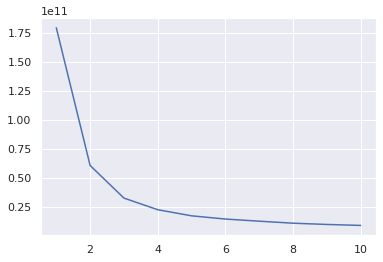

In [27]:
from sklearn.cluster import KMeans
codo(11,X)

n° de cluster = 3

# Usamos aparte el meanshift para tambien ver n° de clusters

In [28]:
from sklearn.cluster import estimate_bandwidth, MeanShift

In [29]:
bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
bw

4918.418059097005

In [30]:
ms = MeanShift(bandwidth=bw, bin_seeding=True)
ms

MeanShift(bandwidth=4918.418059097005, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [31]:
ms.fit(X)

MeanShift(bandwidth=4918.418059097005, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [32]:
labels = ms.labels_
labels

array([2, 1, 2, ..., 2, 0, 1])

In [33]:
labels_unique = np.unique(labels)
labels_unique

array([0, 1, 2, 3])

In [34]:
centers = ms.cluster_centers_
centers

array([[   42.85      ,  9912.73641414,  1442.55689655,  2125.47226656,
           47.15172414],
       [   20.24652778,  4680.51003813,   778.25347222,  1933.86939277,
           46.28472222],
       [   66.81461676, 15454.00346891,  1918.88770053,  2370.33502403,
           46.81639929],
       [   42.        ,  9598.200195  , 17511.        ,  2400.18135998,
           41.5       ]])

In [35]:
print(f'number of estimated clusters : {len(labels_unique)}')

number of estimated clusters : 4


# Métricas

Para este estudio se ocupara el numero de cluster determinado por el codo

In [36]:
num_clusters = 3

In [37]:
import sklearn.metrics as metrics
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X_scaler)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.1586321027552531

El valor que nos dio es cercano a cero, nos indica que puede haber sobreposición de clusters

In [38]:
metrics.calinski_harabasz_score(X, labels)

1484.578106257195

Debido a que el valor es alto, nos indica que los clusters son densos y bien definidos.

# Reducción de dimensionalidad

In [39]:
X_scaler

array([[ 0.66879654,  0.6255641 , -0.54181421,  1.36834987, -1.42417739],
       [-1.2773619 , -1.26835398, -0.76086011, -0.735815  ,  0.72998298],
       [ 0.83698307,  0.85339599,  0.43188648, -0.05418166,  1.4193143 ],
       ...,
       [-0.07602953, -0.0789195 , -0.32864874, -0.79232649, -0.47634683],
       [-0.7728023 , -0.76788955, -0.79663271,  2.29012727,  0.47148374],
       [-1.54165502, -1.53570843, -0.83926581, -0.70429308,  0.98848223]])

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

In [42]:
X_pca = pca.fit_transform(X_scaler)
X_pca

array([[ 1.56778037, -1.5927395 ],
       [-2.14530156, -0.04770508],
       [ 0.7941534 ,  1.49803854],
       ...,
       [-0.45273212, -0.31467369],
       [-0.06050945, -1.05168383],
       [-2.50701748,  0.00981865]])

In [43]:
print(pca.explained_variance_ratio_)

[0.52785709 0.22018572]


In [44]:
print(pca.singular_values_)

[69.40242035 44.82404141]


Text(0.5, 1.0, 'PCA')

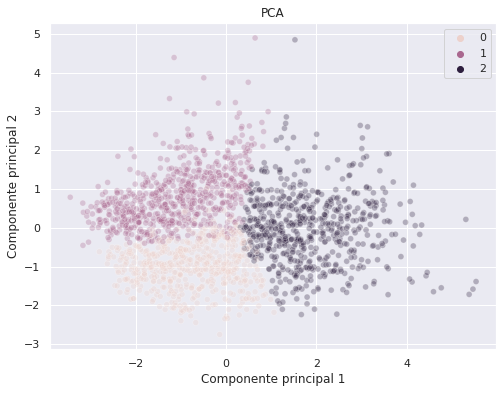

In [45]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(X_pca[:,0],X_pca[:,1], hue=labels, alpha =0.3)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA')

In [46]:
pca.components_

array([[ 0.5870817 ,  0.58741277,  0.21163409,  0.48054606, -0.1859242 ],
       [ 0.12930449,  0.12435253,  0.61232564, -0.30633101,  0.70642439]])

In [47]:
pca.explained_variance_

array([2.64073243, 1.10153218])

In [48]:
pca.explained_variance_ratio_

array([0.52785709, 0.22018572])

In [49]:
# number of components
n_pcs= pca.components_.shape[0]
n_pcs

2

In [50]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important

[1, 4]

In [51]:
initial_feature_names = filtro
#initial_feature_names = df_.columns.values.tolist()
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['Movimiento (t)', 'Edad del empleado']

In [52]:
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,Movimiento (t)
1,PC1,Edad del empleado


PCA nos da a conocer los 2 componentes que tienen mas peso en el data set que en este caso son: Movimiento y Edad del empleado

# K-means

In [65]:
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X_pca)
centers=kmeans.cluster_centers_

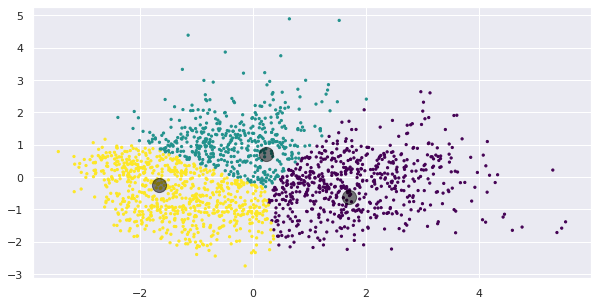

In [66]:
plt.figure(figsize=(10,5))
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X_pca).predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Como podemos notar en la imagen K-means nos genera la imagen de dos clusters con sus respectivos centroides

In [69]:
cluster_report(X, labels)

,class_name,instance_count,rule_list
1,0,622,[0.5512820512820513] (Movimiento (t) > 15650.49951171875) and (R-ef (t/h) <= 2408.1064453125) and (Edad del empleado <= 44.0)[0.9219015280135824] (Movimiento (t) > 15650.49951171875) and (R-ef (t/h) > 2408.1064453125)
2,1,466,[0.8245614035087719] (Movimiento (t) <= 15650.49951171875) and (tdem (seg) <= 1884.5) and (Movimiento (t) > 11156.20068359375) and (Edad del empleado > 52.0)[0.9112426035502958] (Movimiento (t) <= 15650.49951171875) and (tdem (seg) > 1884.5) and (Edad del empleado > 40.5)[0.9559748427672956] (Movimiento (t) > 15650.49951171875) and (R-ef (t/h) <= 2408.1064453125) and (Edad del empleado > 44.0)
0,2,737,[0.9730185497470489] (Movimiento (t) <= 15650.49951171875) and (tdem (seg) <= 1884.5) and (Movimiento (t) <= 11156.20068359375)[0.7326732673267327] (Movimiento (t) <= 15650.49951171875) and (tdem (seg) <= 1884.5) and (Movimiento (t) > 11156.20068359375) and (Edad del empleado <= 52.0)[0.6075949367088608] (Movimiento (t) <= 15650.49951171875) and (tdem (seg) > 1884.5) and (Edad del empleado <= 40.5)


Podemos notar las características que posee cada cluster para hacer contraste con la anterior imagen 


*   class_name = 0 → morado
*   class_name = 1 → verde
*   class_name = 2 → amarillo


Podemos concluir que los cluster internamente poseen segmentaciones las cuales podemos apreciar con las características mostradas anteriormente, gracias a esto ya podemos clasificar de forma concreta.

Herarchical Clustering

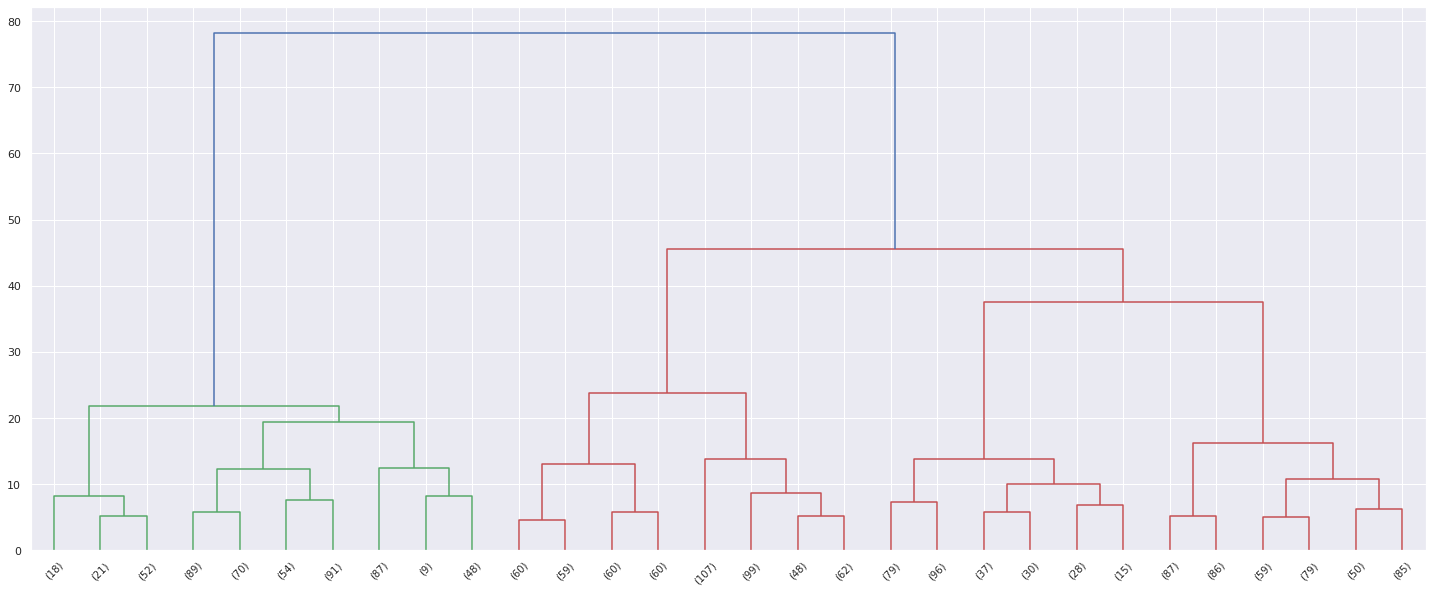

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(25, 10))
modelo = dendrogram(linkage(X_pca, method='ward'),truncate_mode='lastp',leaf_font_size=10.)

A modo de conclusión se necesita seguir generando un estudio más a fondo del como se generan dichas segmentaciones en los clusters, ademas se necesita generar una etiqueta de dichos cluster para darle un peso o un valor a dicha clasificación.